<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [3]:
#df = pd.read_csv('loan_train.csv')
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

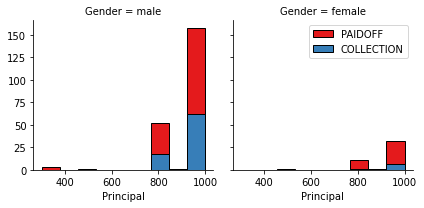

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

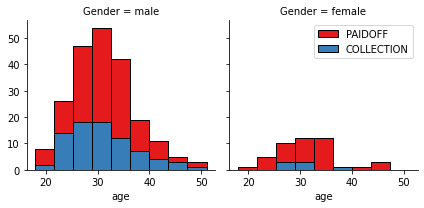

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


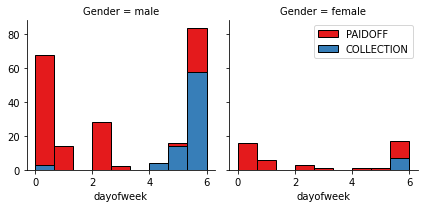

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()
Feature.columns

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')

### Feature Selection


Let's define feature sets, X:


In [17]:
X=np.asarray(Feature)

#X = Feature
X[0:5]

array([[1000,   30,   45,    0,    0,    0,    1,    0],
       [1000,   30,   33,    1,    0,    1,    0,    0],
       [1000,   15,   27,    0,    0,    0,    0,    1],
       [1000,   30,   28,    1,    1,    0,    0,    1],
       [1000,   30,   29,    0,    1,    0,    0,    1]], dtype=int64)

What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

## Features and Outcome Names

In [20]:
feature_names = Feature.columns
outcome_names = df['loan_status'].value_counts().keys()

print(feature_names)
print(outcome_names)

Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object')
Index(['PAIDOFF', 'COLLECTION'], dtype='object')


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [21]:
#Import 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
def plot_search_grid_accuracy(name, results):
    "this function plots the results of a hyperparameters grid search"
    
    mean_acc = results['mean_test_score']
    std_acc =  results['std_test_score']

    samples = np.arange(len(mean_acc))

    max_index = mean_acc.argmax()
    max_acc = mean_acc.max()

    plt.plot(samples, mean_acc,'g')

    plt.plot(max_index, max_acc, marker='o', color='r') #adds the point
    
    plt.fill_between(samples ,mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
    
    plt.title(name)
    plt.legend(('Accuracy ', 'Best fit', '+/- 1xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Optimal grid search index (n)')
    plt.tight_layout()
    plt.rcParams["figure.figsize"] = (9,5)
    plt.show()
    
    print(name, "classifier accuracy: (best) %.4f" % max_acc, " at index =", max_index) 
    print(name, "classifier tuned hyperparameters: (best parameters)", results['params'][mean_acc.argmax()])

In [24]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42) #The meaning of life is 42 :-D

print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [25]:
Ks = 10 # maximum number of neighbors
parameters = {'n_neighbors': range(1, Ks),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights':['uniform','distance'],
              'p': [1,2]
              }

knn_cv = GridSearchCV(KNeighborsClassifier(), parameters, verbose=1, refit=True)
knn_cv.fit(X_train, Y_train)

print("KNN tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("KNN accuracy : (best) ",knn_cv.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
KNN tuned hpyerparameters :(best parameters)  {'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNN accuracy : (best)  0.742987012987013


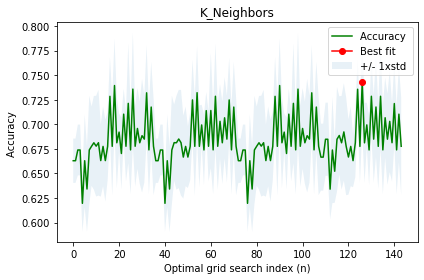

K_Neighbors classifier accuracy: (best) 0.7430  at index = 126
K_Neighbors classifier tuned hyperparameters: (best parameters) {'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [26]:
plot_search_grid_accuracy('K_Neighbors', knn_cv.cv_results_)

Train set Accuracy (for train_test splitted data): 0.8043 
Test  set Accuracy (for train_test splitted data): 0.7571
Confusion matrix, without normalization
[[51  5]
 [12  2]]


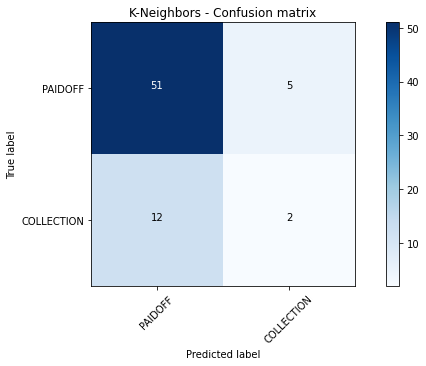

In [27]:
#Evaluation
knn = knn_cv.best_estimator_
Y_hat_knn = knn.predict(X_test)
Y_hat_knn_proba = knn.predict_proba(X_test)

print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(Y_test, Y_hat_knn))

cnf_matrix = confusion_matrix(Y_test, Y_hat_knn, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='K-Neighbors - Confusion matrix')


# Decision Tree


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
D-Tree tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
D-Tree accuracy : (best)  0.7648051948051948


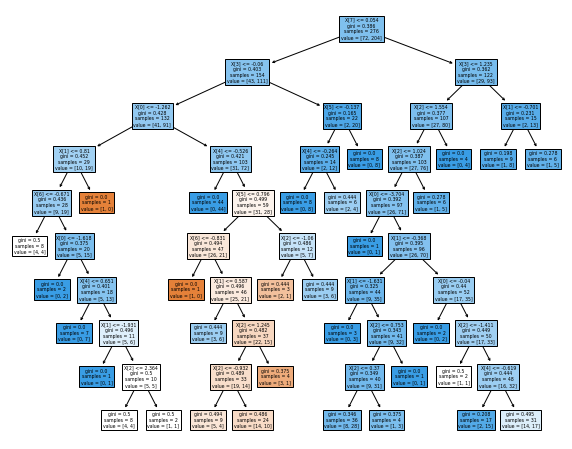

In [28]:
Ts = 10 # Max tree depth

parameters = {'criterion': ['gini', 'entropy','log_loss'],
     'splitter': ['best', 'random'],
     'max_depth': range(1,Ts),
     'max_features': ['sqrt','log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]
     }

tree_cv = GridSearchCV(DecisionTreeClassifier(), parameters, verbose=1, refit=True)
tree_cv.fit(X_train, Y_train)

print("D-Tree tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("D-Tree accuracy : (best) ",tree_cv.best_score_)

import sklearn.tree as dtree
plt.figure(figsize=(10,8))
dtree.plot_tree(tree_cv.best_estimator_, filled=True)

plt.show()

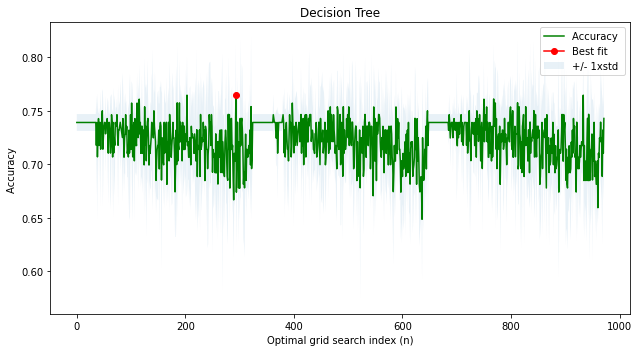

Decision Tree classifier accuracy: (best) 0.7648  at index = 293
Decision Tree classifier tuned hyperparameters: (best parameters) {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [29]:
plot_search_grid_accuracy('Decision Tree', tree_cv.cv_results_)

Train set Accuracy (for train_test splitted data): 0.7754 
Test  set Accuracy (for train_test splitted data): 0.6571
Confusion matrix, without normalization
[[43 13]
 [11  3]]


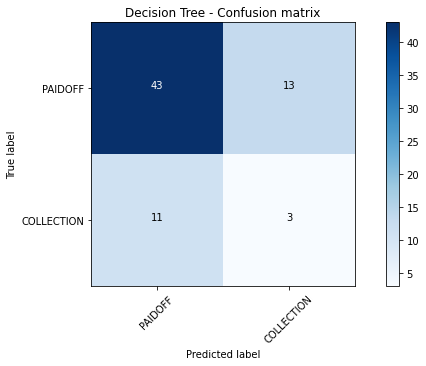

In [30]:
#Evaluation
tree = tree_cv.best_estimator_
Y_hat_tree = tree.predict(X_test)
Y_hat_tree_proba = tree.predict_proba(X_test)

print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(Y_train, tree.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(Y_test, Y_hat_tree))

cnf_matrix = confusion_matrix(Y_test, Y_hat_tree, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Decision Tree - Confusion matrix')

# Support Vector Machine


In [31]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': [0.01, 0.1, 1, 10],
              'gamma':['auto', 'scale'],
              'probability':[True]
              }

svm_cv = GridSearchCV(SVC(), parameters, verbose=1, refit=True)
svm_cv.fit(X_train, Y_train)

print("SVM tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("SVM accuracy : (best) ",tree_cv.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
SVM tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
SVM accuracy : (best)  0.7648051948051948


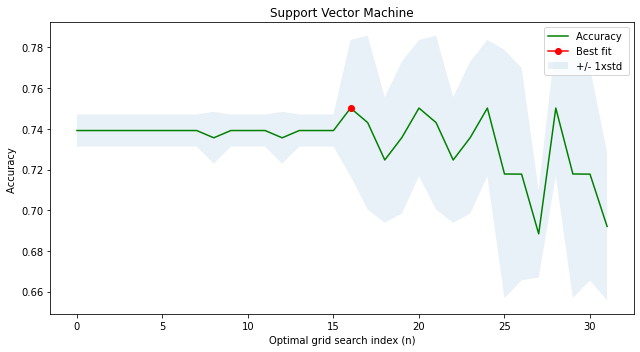

Support Vector Machine classifier accuracy: (best) 0.7502  at index = 16
Support Vector Machine classifier tuned hyperparameters: (best parameters) {'C': 1, 'gamma': 'auto', 'kernel': 'linear', 'probability': True}


In [32]:
plot_search_grid_accuracy('Support Vector Machine', svm_cv.cv_results_)

Train set Accuracy (for train_test splitted data): 0.7645 
Test  set Accuracy (for train_test splitted data): 0.6714
Confusion matrix, without normalization
[[44 12]
 [11  3]]


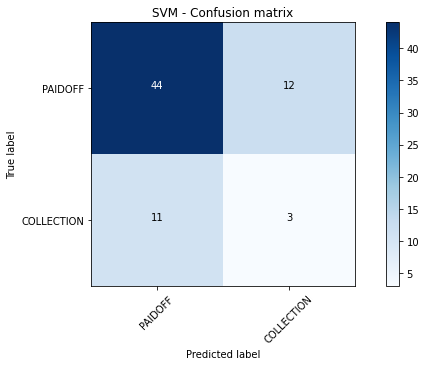

In [33]:
#Evaluation
svm = svm_cv.best_estimator_
Y_hat_svm = svm.predict(X_test)
Y_hat_svm_proba = svm.predict_proba(X_test)

print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(Y_train, svm.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(Y_test, Y_hat_svm))

cnf_matrix = confusion_matrix(Y_test, Y_hat_svm, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='SVM - Confusion matrix')


# Logistic Regression


In [34]:
parameters ={'C':[0.01,0.1,1,10],
             'solver':['lbfgs', 'liblinear', 'sag']}

logreg_cv = GridSearchCV(LogisticRegression(), parameters, verbose=1, refit=True)
logreg_cv.fit(X_train, Y_train)

print("Logistic regression tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Logistic regression accuracy : (best) ",logreg_cv.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic regression tuned hpyerparameters :(best parameters)  {'C': 0.01, 'solver': 'liblinear'}
Logistic regression accuracy : (best)  0.7683766233766234


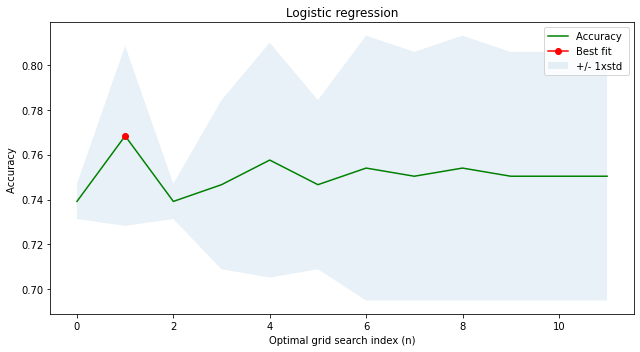

Logistic regression classifier accuracy: (best) 0.7684  at index = 1
Logistic regression classifier tuned hyperparameters: (best parameters) {'C': 0.01, 'solver': 'liblinear'}


In [35]:
plot_search_grid_accuracy('Logistic regression', logreg_cv.cv_results_)

Train set Accuracy (for train_test splitted data): 0.7645 
Test  set Accuracy (for train_test splitted data): 0.7000
Confusion matrix, without normalization
[[46 10]
 [11  3]]


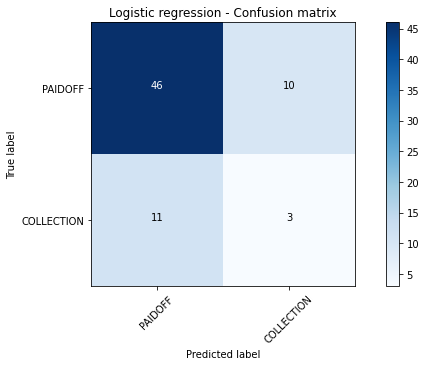

In [36]:
#Evaluation
logreg = logreg_cv.best_estimator_
Y_hat_logreg = logreg.predict(X_test)
Y_hat_logreg_proba = logreg.predict_proba(X_test)

print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(Y_train, logreg.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(Y_test, Y_hat_logreg))

cnf_matrix = confusion_matrix(Y_test, Y_hat_logreg, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Logistic regression - Confusion matrix')

# Model Evaluation using Test set


In [37]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [38]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [39]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [43]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

X_test = np.asarray(test_Feature)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

Y_test = test_df['loan_status'].values

print ('Test set:', X_test.shape,  Y_test.shape)

Test set: (54, 8) (54,)


In [46]:
yhat_knn = knn.predict(X_test)
scores_knn = [jaccard_score(Y_test, yhat_knn, pos_label='PAIDOFF'), f1_score(Y_test, yhat_knn, average='weighted'), 'NA']

yhat_dtree = tree.predict(X_test)
scores_dtree = [jaccard_score(Y_test, yhat_dtree, pos_label='PAIDOFF'), f1_score(Y_test, yhat_dtree, average='weighted'), 'NA']

yhat_svm = svm.predict(X_test)
scores_svm = [jaccard_score(Y_test, yhat_svm, pos_label='PAIDOFF'), f1_score(Y_test, yhat_svm, average='weighted'), 'NA']

yhat_lr = logreg.predict(X_test)
yhat_lr_p = logreg.predict_proba(X_test)
scores_lr = [jaccard_score(Y_test, yhat_lr, pos_label='PAIDOFF'), f1_score(Y_test, yhat_lr, average='weighted'), log_loss(Y_test, yhat_lr_p)]


In [47]:
scores = [scores_knn, scores_dtree, scores_svm, scores_lr]
report = pd.DataFrame(scores, index=["KNN", "Decision Tree", "SVM", "LogisticRegression"], columns=["Jaccard", "F1-score", "LogLoss"]).rename_axis("Algorithm", axis=1)

pd.DataFrame(report)

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.679245,0.626541,NA
Decision Tree,0.760000,0.743434,NA
SVM,0.750000,0.764550,NA
LogisticRegression,0.760000,0.743434,0.56403


In [48]:
np.asarray(report)

array([[0.6792452830188679, 0.626541384672668, 'NA'],
       [0.76, 0.7434343434343433, 'NA'],
       [0.75, 0.7645502645502646, 'NA'],
       [0.76, 0.7434343434343433, 0.5640295186709522]], dtype=object)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
